In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

LOADING AND SPLITTING THE DATA

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
print('Training images : {}'.format(x_train.shape))
print('Testing images: {}'.format(x_test.shape))

Training images : (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


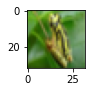

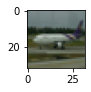

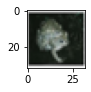

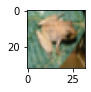

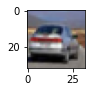

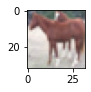

In [ ]:
for i in range(232, + 238):
  plt.subplot(120+ 1+ i)
  img = x_train[i]
  plt.imshow(img)
  plt.show()

PREPROCESSING THE DATA

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

n_classes = 10

print("shape before one-hot coding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot codeing:", Y_train.shape)
print("Shape after one-hot codeing:", Y_test.shape)

shape before one-hot coding:  (50000, 1)
Shape after one-hot codeing: (50000, 10)
Shape after one-hot codeing: (10000, 10)


BUILDING THE MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10, activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model
model.fit(x_train, Y_train, batch_size=120, epochs=10, validation_data=(x_test, Y_test))

Epoch 1/10
417/417 [==============================] - 549s 1s/step - loss: 1.5932 - accuracy: 0.4148 - val_loss: 1.1379 - val_accuracy: 0.5968
Epoch 2/10
417/417 [==============================] - 544s 1s/step - loss: 1.0952 - accuracy: 0.6135 - val_loss: 0.9105 - val_accuracy: 0.6828
Epoch 3/10
417/417 [==============================] - 541s 1s/step - loss: 0.9192 - accuracy: 0.6784 - val_loss: 0.8450 - val_accuracy: 0.7064
Epoch 4/10
417/417 [==============================] - 543s 1s/step - loss: 0.7997 - accuracy: 0.7198 - val_loss: 0.7526 - val_accuracy: 0.7400
Epoch 5/10
417/417 [==============================] - 544s 1s/step - loss: 0.7193 - accuracy: 0.7498 - val_loss: 0.7118 - val_accuracy: 0.7578
Epoch 6/10
417/417 [==============================] - 544s 1s/step - loss: 0.6508 - accuracy: 0.7715 - val_loss: 0.7046 - val_accuracy: 0.7563
Epoch 7/10
417/417 [==============================] - 538s 1s/step - loss: 0.5976 - accuracy: 0.7906 - val_loss: 0.6798 - val_accuracy: 0.7692

PREDICTING

In [ ]:
classes = range(0, 10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

#zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

#generate batch 9 images to predict 
batch = x_test[100:109]
labels = np.argmax(Y_test[100:109], axis=-1)

#make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 49ms/step


In [ ]:
print(predictions)

[[2.61787363e-06 8.05623870e-08 5.64130628e-03 9.35430638e-03
  7.06291378e-01 1.01606853e-01 1.95324872e-04 1.76906824e-01
  2.92408174e-07 1.00096679e-06]
 [2.74317688e-04 2.50605990e-05 1.09008662e-02 1.67683944e-01
  2.50730086e-02 4.67383534e-01 1.82684865e-02 3.09956968e-01
  1.55710135e-04 2.78052787e-04]
 [5.98033112e-05 2.75410366e-05 5.53284166e-03 1.22109167e-02
  6.66795764e-04 1.57382358e-02 9.65576708e-01 1.02583268e-04
  7.24609054e-05 1.22293295e-05]
 [8.90081935e-07 9.31453243e-08 5.43692659e-05 9.84354854e-01
  2.13770196e-03 1.26500977e-02 7.63841264e-04 3.64026528e-05
  2.75758737e-07 1.48109302e-06]
 [4.50785853e-09 9.99963522e-01 9.62533615e-14 5.00506104e-13
  3.10216669e-15 4.05723996e-15 7.96934133e-14 2.88157356e-14
  2.45616327e-09 3.64975713e-05]
 [4.13878318e-08 9.99885082e-01 3.12752879e-11 2.12890899e-10
  2.95584520e-13 7.27158403e-11 5.14680631e-10 3.15164642e-13
  1.92553089e-05 9.56432705e-05]
 [3.16295633e-03 3.65102809e-04 5.94618218e-03 4.57319885e

In [ ]:
for image in predictions :
  print(np.sum(image))

1.0
1.0
1.0000001
1.0
1.0
1.0
1.0000001
1.0
1.0


In [ ]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[4 5 6 3 1 1 5 6 8]


FINAL OBJECT DETECTION

<function matplotlib.pyplot.show>

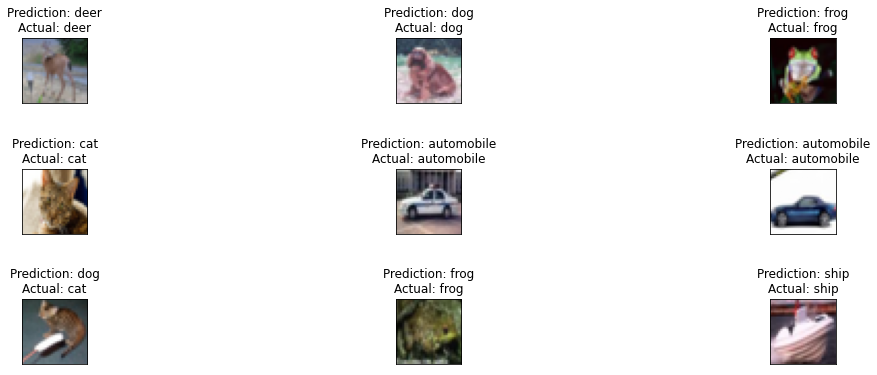

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
    
    #plot the image 
    axs[i].imshow(img)

#show the plot
plt.show    